In [120]:
# Importando as LIBS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import openpyxl 
import datetime as dt
import seaborn as sns

In [121]:
# Importando os dados Ibovepa
ibovespa = yf.download(tickers='^BVSP', period='ytd')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [122]:
# Verificando DataFrame
ibovespa.head(15)

Ticker,^BVSP
Date,
2024-01-02,132697.0
2024-01-03,132834.0
2024-01-04,131226.0
2024-01-05,132023.0
2024-01-08,132427.0
2024-01-09,131447.0
2024-01-10,130841.0
2024-01-11,130649.0
2024-01-12,130988.0


In [123]:
# Valores duplicados
ibovespa.duplicated().sum()


np.int64(6)

In [124]:
# Info
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2024-01-02 to 2024-12-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   239 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [125]:
# Estatisticas
ibovespa.describe()

Ticker,^BVSP
count,239.000000
mean,128511.102478
std,3684.300670
min,119138.000000
25%,126672.000000
50%,128159.000000
75%,130627.000000
max,137344.000000


In [126]:
# Estilos do gráfico
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [127]:
# média móvel
media_movel = ibovespa['^BVSP'].rolling(5).mean()

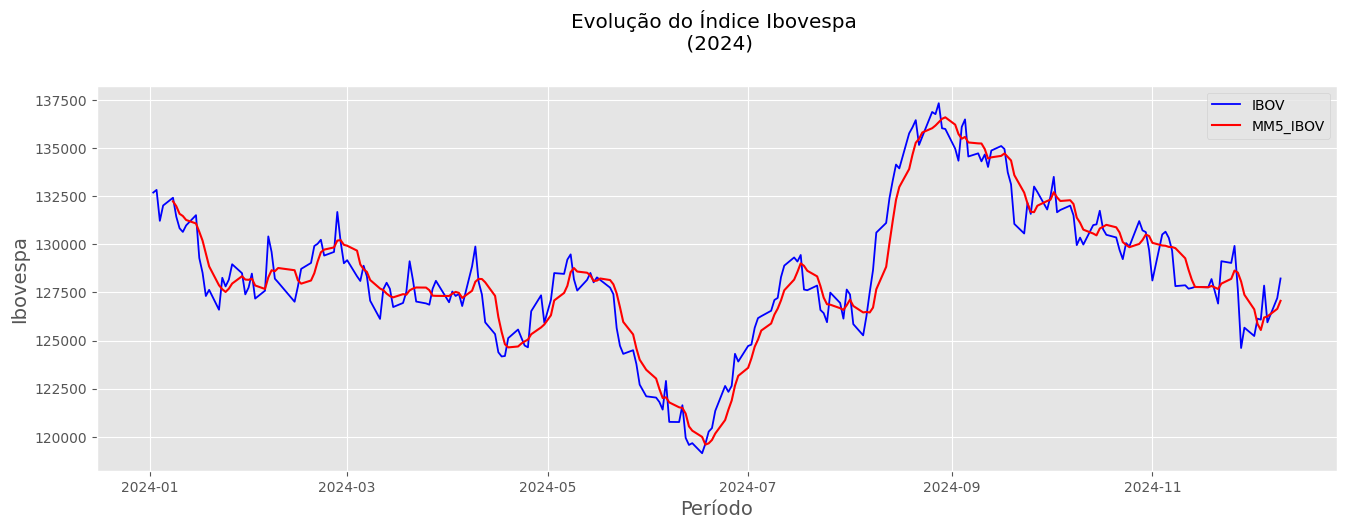

In [128]:
# Gráfico
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Evolução do Índice Ibovespa \n (2024)', pad=26)
plt.plot(ibovespa.index, ibovespa['^BVSP'], color='blue', linewidth=1.3, label='IBOV')
plt.plot(media_movel, color='red', label='MM5_IBOV')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Ibovespa', fontsize=14)
plt.legend();


In [129]:
# Carteira de ativos 
tickers = ['PETR4.SA', 'WEGE3.SA', 'VALE']
carteira = yf.download(tickers=tickers, period='ytd')['Adj Close']
carteira

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-02,33.281128,14.497677,35.979404
2024-01-03,34.320606,14.414621,36.254879
2024-01-04,34.029911,14.239285,35.772800
2024-01-05,34.109192,14.119316,35.389099
2024-01-08,33.853725,14.091631,35.477646
...,...,...,...
2024-12-04,39.250000,9.510000,55.000000
2024-12-05,39.639999,9.610000,54.930000
2024-12-06,39.029999,9.360000,55.599998


In [130]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2024-01-02 to 2024-12-10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  239 non-null    float64
 1   VALE      238 non-null    float64
 2   WEGE3.SA  239 non-null    float64
dtypes: float64(3)
memory usage: 7.7 KB


In [131]:
carteira.isnull().sum()

Ticker
PETR4.SA    6
VALE        7
WEGE3.SA    6
dtype: int64

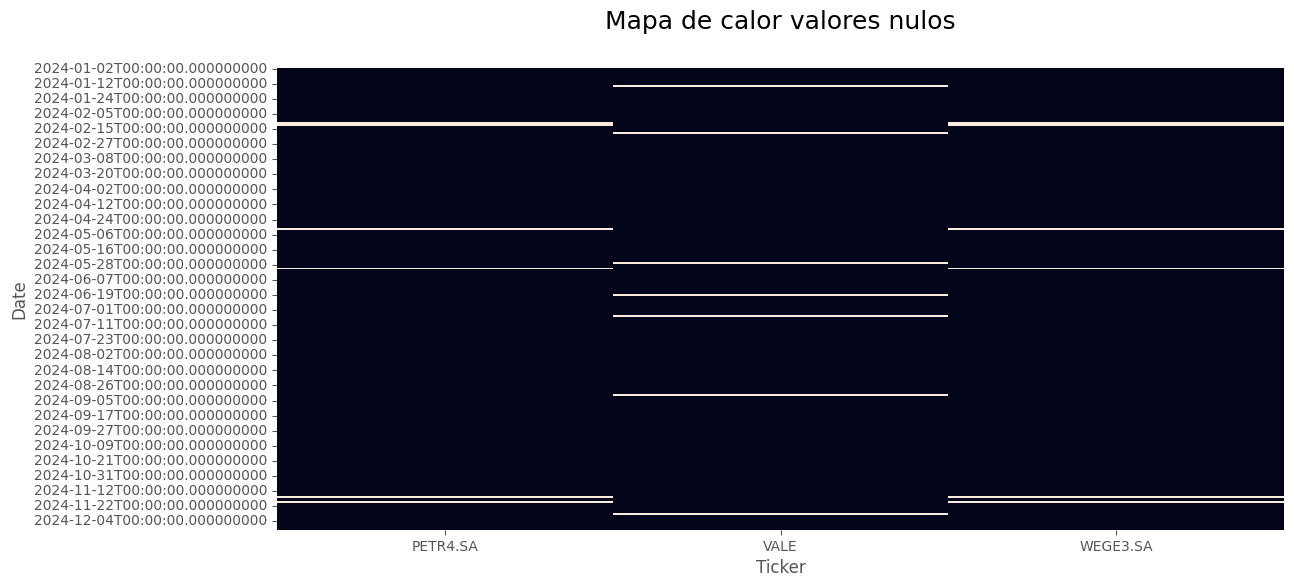

In [132]:
# Mapa de calor nulos

plt.figure(figsize=(13,6))
plt.title('Mapa de calor valores nulos', fontsize=18, pad=28)
sns.heatmap(carteira.isnull(), cbar=False);

In [133]:
# Estatistica
carteira.describe()

Ticker,PETR4.SA,VALE,WEGE3.SA
count,239.000000,238.000000,239.000000
mean,36.153198,11.337036,44.261307
std,1.895810,1.026841,8.317788
min,31.404770,9.360000,31.817715
25%,35.015976,10.532787,37.624207
50%,36.284176,11.153771,40.813370
75%,37.397512,12.111862,53.453081
max,40.189999,14.497677,57.189999


In [134]:
# Excluindo valores nulos
carteira.dropna(inplace=True)

In [135]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2024-01-02 to 2024-12-10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  232 non-null    float64
 1   VALE      232 non-null    float64
 2   WEGE3.SA  232 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB


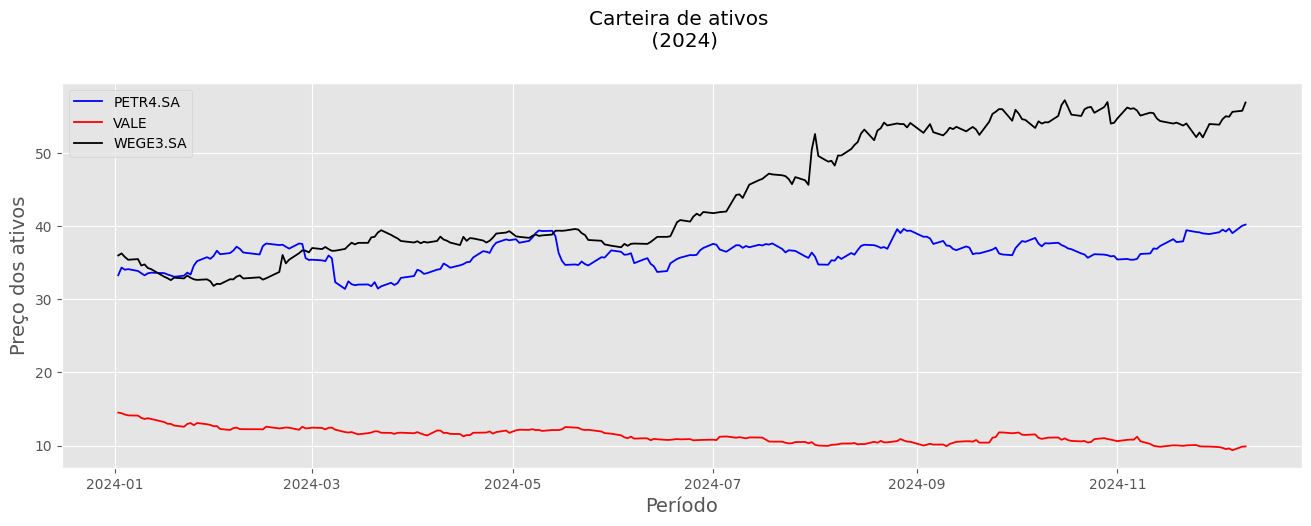

In [136]:
# Gráfico
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Carteira de ativos \n (2024)', pad=26)
plt.plot(carteira.index, carteira['PETR4.SA'], color='blue', linewidth=1.3, label='PETR4.SA')
plt.plot(carteira['VALE'], color='red', linewidth=1.3, label='VALE')
plt.plot(carteira['WEGE3.SA'], color='black', linewidth=1.3, label='WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Preço dos ativos', fontsize=14)
plt.legend();
